In [116]:
import warnings
warnings.filterwarnings("ignore")

In [96]:
!pip install Faker
from faker import Faker
import datetime
from pandas import DataFrame
import random
import bisect
import collections
import numpy as np



You should consider upgrading via the 'pip install --upgrade pip' command.


In [97]:
def cdf(weights):
    total = sum(weights)
    result = []
    cumsum = 0
    for w in weights:
        cumsum += w
        result.append(cumsum / total)
    return result

def choice(population, weights):
    assert len(population) == len(weights)
    cdf_vals = cdf(weights)
    x = random.random()
    idx = bisect.bisect(cdf_vals, x)
    return population[idx]

#weights=[0.995,0.005]
#population = ["Closed","Cancelled"]
#counts = collections.defaultdict(int)
#for i in range(1000):
#    counts[choice(population, weights)] += 1
#print(counts)

# % test.py
# defaultdict(<type 'int'>, {'A': 3066, 'C': 2964, 'B': 3970})

In [125]:
import random
from random import randrange
from datetime import timedelta
from datetime import datetime
from datetime import date

now= datetime.now()
today= date.today()
data=[]
fake=Faker()
def generate_record():
    created_date= fake.date_time_this_year(before_now=True, after_now=False)
    time_to_ack=random.lognormvariate(0,.5)*
    time_to_resolve=random.lognormvariate(0,.5)* 240
    assigned_date= created_date+timedelta(minutes=time_to_ack)
    resolved_date=assigned_date+ timedelta(minutes=time_to_resolve)
    duration=(resolved_date-created_date).total_seconds()
    
    status=choice(["Resolved","Closed","Cancelled"],[.1,.89,.01])
    priority= choice([1,2,3,4,5],[.01,.05,.35,.5,.09])
    if resolved_date> now:
        resolved_date=None
        status="Open"
        duration=(now-created_date).total_seconds()
    id= "INC"+ str(fake.pyint(min_value=1, max_value=9999,step=1)).zfill(4)
    user=random.choice(["Tivoli","Tivoli 2","SSC","APATEL","JSMITH","MAHMED"])
    team=random.choice(["CG_Network","CG_Migration","CG_Host"])
    duration_hs=int(round((duration/60)/60,0))
    return [id,created_date,resolved_date,user,team,status,priority,duration,duration_hs]

for i in range(1,2000):
    data.append(generate_record())
    
df=DataFrame.from_records(data)
df.columns=["number","created_on","resolved_on","created_by","assignment_group","status","priority","duration","duration_hs"]
df.head()

,number,created_on,resolved_on,created_by,assignment_group,status,priority,duration,duration_hs
0,INC4422,2019-08-08 14:55:49,2019-08-08 16:23:02.477095,Tivoli 2,CG_Migration,Closed,3,5233.477095,1
1,INC4268,2019-05-21 22:42:10,2019-05-22 05:07:26.916622,Tivoli,CG_Migration,Closed,2,23116.916622,6
2,INC6274,2019-04-13 21:46:07,2019-04-14 02:03:15.784497,MAHMED,CG_Network,Resolved,4,15428.784497,4
3,INC9310,2019-07-08 07:29:41,2019-07-08 13:38:17.603723,APATEL,CG_Migration,Closed,3,22116.603723,6
4,INC0540,2019-03-13 11:13:38,2019-03-13 15:49:50.617901,Tivoli 2,CG_Host,Closed,4,16572.617901,5


In [120]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


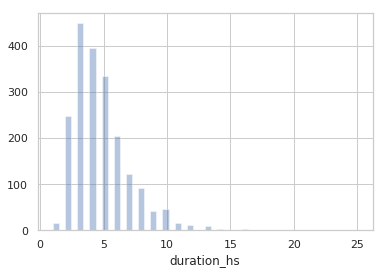

In [127]:

sns.set(style="whitegrid")
data=df["duration_hs"]
sns.distplot(data,kde=False,bins=50)